In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/kidney_disease-(shuffeled).csv'
df = pd.read_csv(file_path)

# Inspect the dataset structure
print(df.info())
print(df.head())

# Step 1: Handle Missing Values
# Let's first identify the missing values
print(df.isnull().sum())

# We'll use SimpleImputer to fill missing values. For numerical features, we'll use the mean,
# and for categorical features, we'll use the mode (most frequent value).

# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# For numerical features, fill missing values with the mean
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# For categorical features, fill missing values with the most frequent value (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Step 2: Encode Categorical Variables
# Convert categorical variables into numerical values using LabelEncoder or One-Hot Encoding.
# We will use Label Encoding for simplicity.

label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("Encoded DataFrame:")
print(df.head())

# Step 3: Scaling the Features
# It's important to scale numerical features before applying machine learning models or PCA.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_cols])

# Add scaled features back to the DataFrame
df[numerical_cols] = scaled_features

# Final Preprocessed DataFrame
print("Preprocessed DataFrame:")
print(df.head())

# Now, df is ready for use in machine learning or further analysis.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

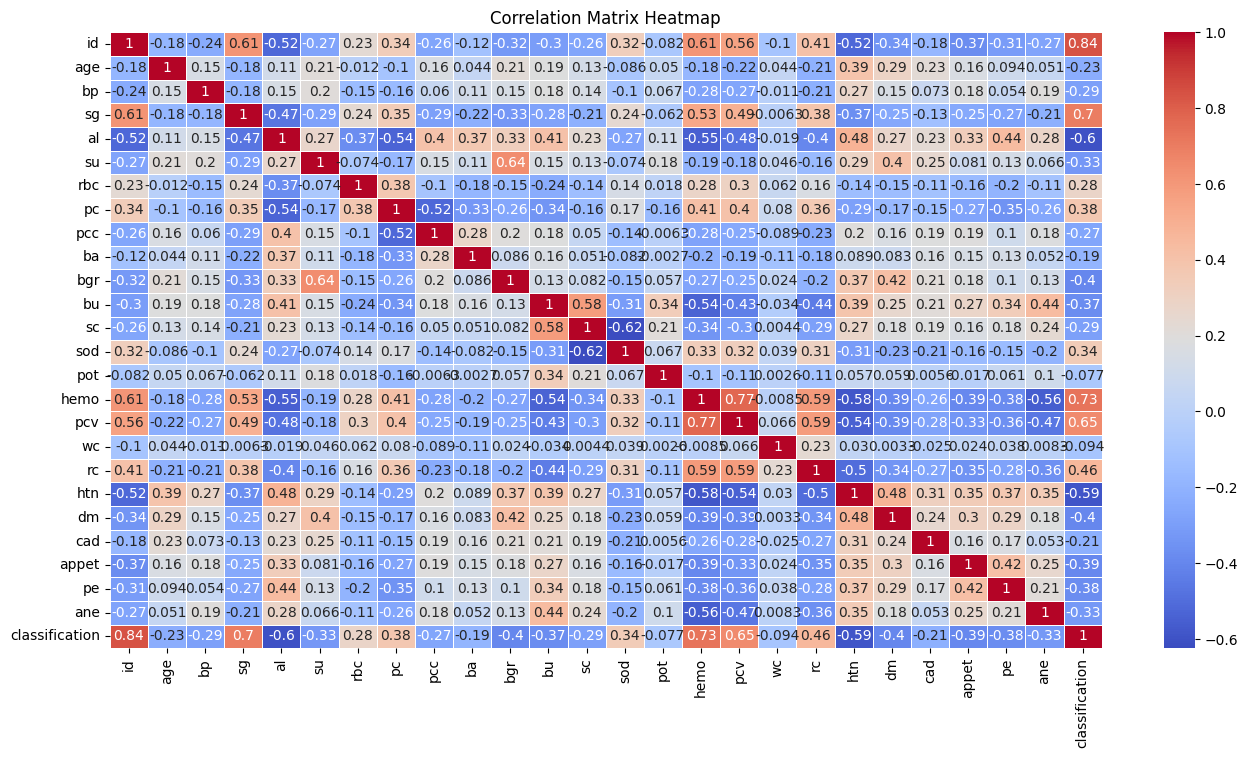

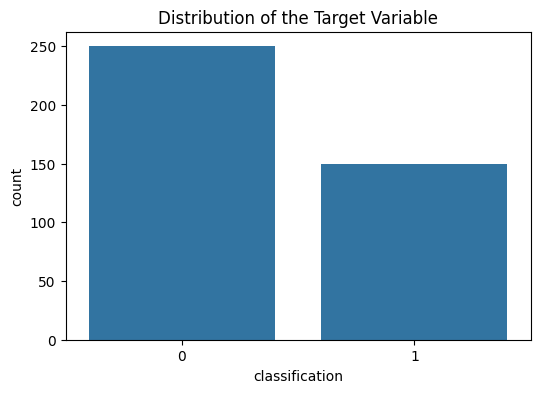

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Visualize Correlation Matrix using a Heatmap
plt.figure(figsize=(16, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Step 2: Visualize the Distribution of the Target Variable using a Count Plot
# Assuming the target column is named 'classification'
plt.figure(figsize=(6, 4))
sns.countplot(x='classification', data=df)
plt.title('Distribution of the Target Variable')
plt.show()


Without PCA

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assuming df is your DataFrame and it has already been preprocessed
# Split the data into features (X) and target (y)
X = df.drop('classification', axis=1)  # Features
y = df['classification']  # Target

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the count of training and testing samples
print(f"Training samples count: {len(X_train)}")
print(f"Testing samples count: {len(X_test)}")

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print classification report for detailed metrics
    print(f"\nModel: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return accuracy, precision, recall, f1


# Train and evaluate Support Vector Machine
svm = SVC(random_state=42)
evaluate_model(svm, X_train, X_test, y_train, y_test)

# Train and evaluate Naive Bayes
nb = GaussianNB()
evaluate_model(nb, X_train, X_test, y_train, y_test)


# Train and evaluate K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
evaluate_model(knn, X_train, X_test, y_train, y_test)

# Train and evaluate Neural Network with reduced accuracy
# Reduce hidden layer size further, lower max_iter, and increase learning rate
nn = MLPClassifier(hidden_layer_sizes=(3,), max_iter=50, alpha=1.0, learning_rate_init=0.5, random_state=42)
evaluate_model(nn, X_train, X_test, y_train, y_test)



Training samples count: 280
Testing samples count: 120

Model: SVC
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        75
           1       0.86      0.71      0.78        45

    accuracy                           0.85       120
   macro avg       0.85      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85

Model: GaussianNB
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        75
           1       0.88      1.00      0.94        45

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120

Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1 Score: 0.95

Model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

(0.625, 0.390625, 0.625, 0.4807692307692308)

ROC CURVE


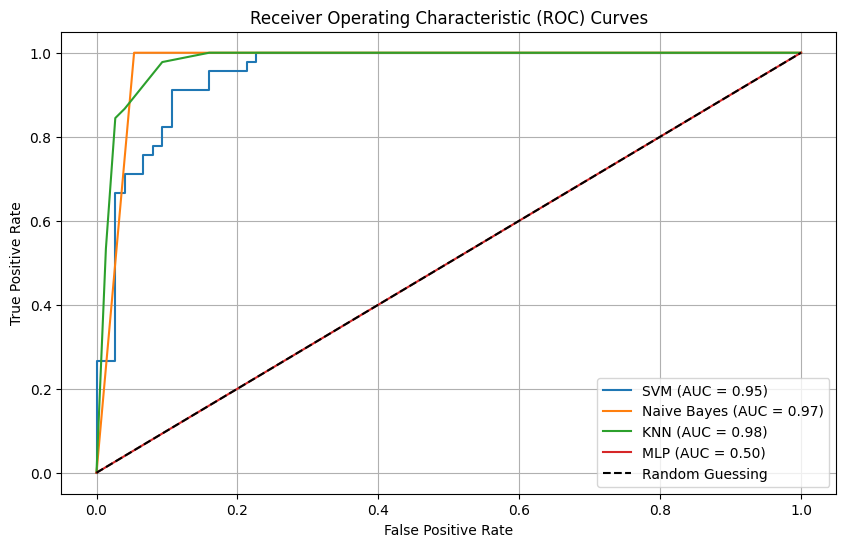

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test contains the true labels and y_probs is a dictionary of predicted probabilities for each model
# Example: y_probs = {'SVM': y_prob_svm, 'Naive Bayes': y_prob_nb, 'KNN': y_prob_knn, 'MLP': y_prob_mlp}

# Plot ROC curves
plt.figure(figsize=(10, 6))

# Compute ROC curve and ROC area for each model
for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Adding labels and title
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Graphical CF with Classification Reports



Model: SVC
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        75
           1       0.86      0.71      0.78        45

    accuracy                           0.85       120
   macro avg       0.85      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


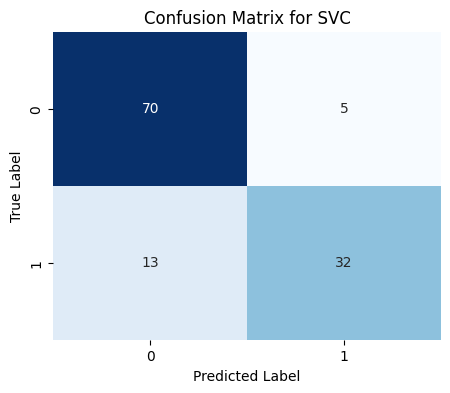


Model: GaussianNB
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        75
           1       0.88      1.00      0.94        45

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120

Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1 Score: 0.95


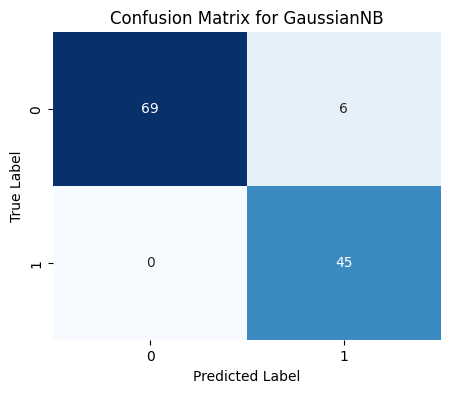


Model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.93      0.87      0.90        45

    accuracy                           0.93       120
   macro avg       0.93      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.92


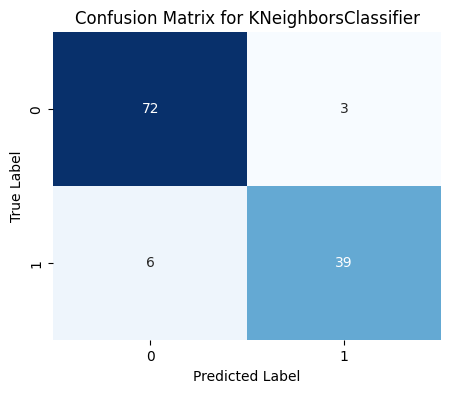


Model: MLPClassifier
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        75
           1       0.00      0.00      0.00        45

    accuracy                           0.62       120
   macro avg       0.31      0.50      0.38       120
weighted avg       0.39      0.62      0.48       120

Accuracy: 0.62
Precision: 0.39
Recall: 0.62
F1 Score: 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


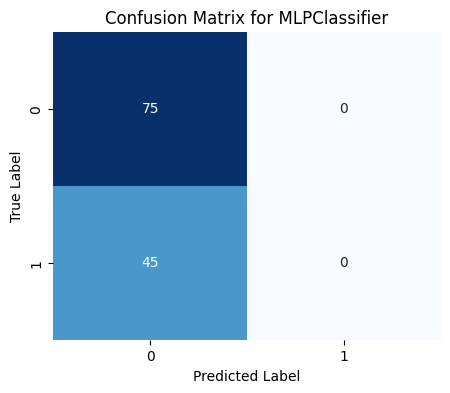

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Updated function to evaluate model performance and plot the confusion matrix
def evaluate_model_with_confusion_matrix(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Print classification report for detailed metrics
    print(f"\nModel: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, model.__class__.__name__)

    return accuracy, precision, recall, f1

# List of models
models = [

    SVC(random_state=42),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5),
    MLPClassifier(hidden_layer_sizes=(3,), max_iter=50, alpha=1.0, learning_rate_init=0.5, random_state=42)


]

# Evaluate each model and plot confusion matrices
for model in models:
    evaluate_model_with_confusion_matrix(model, X_train, X_test, y_train, y_test)


PCA

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
# df = pd.read_csv('path_to_your_file.csv')  # Uncomment this if you need to load the dataset

# Split the data into features (X) and target (y)
X = df.drop('classification', axis=1)  # Features
y = df['classification']  # Target

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the count of training and testing samples
print(f"Training samples count: {len(X_train)}")
print(f"Testing samples count: {len(X_test)}")

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the new shape of the data after PCA
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print classification report for detailed metrics
    print(f"\nModel: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return accuracy, precision, recall, f1


# # Train and evaluate Decision Tree with maximum depth constraint
# dt = DecisionTreeClassifier(max_depth=5, random_state=42)
# evaluate_model(dt, X_train_pca, X_test_pca, y_train, y_test)

# # Train and evaluate Random Forest with maximum depth and minimum samples constraints
# rf = RandomForestClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
# evaluate_model(rf, X_train_pca, X_test_pca, y_train, y_test)


# Train and evaluate Support Vector Machine
svm = SVC(random_state=42)
evaluate_model(svm, X_train_pca, X_test_pca, y_train, y_test)

# Train and evaluate Naive Bayes
nb = GaussianNB()
evaluate_model(nb, X_train_pca, X_test_pca, y_train, y_test)

# Train and evaluate K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train_pca, X_test_pca, y_train, y_test)

# Train and evaluate MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(3,), max_iter=50, alpha=1.0, learning_rate_init=0.5, random_state=42)
evaluate_model(mlp, X_train_pca, X_test_pca, y_train, y_test)


Training samples count: 320
Testing samples count: 80
Original number of features: 25
Reduced number of features after PCA: 2

Model: SVC
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.88      0.77      0.82        30

    accuracy                           0.88        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.88      0.88      0.87        80

Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.87

Model: GaussianNB
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        50
           1       0.92      0.77      0.84        30

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.88        80
weighted avg       0.89      0.89      0.89        80

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Model: KNeighborsClassifier
              precision    recall  f1-scor

(0.8875, 0.8904545454545454, 0.8875, 0.885064935064935)

Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define individual models
svm = SVC(probability=True, random_state=42)  # Set probability=True for soft voting
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
nn = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, alpha=0.5, random_state=42)

# Function to evaluate Voting Classifier with a list of models
def evaluate_ensemble(models, X_train, X_test, y_train, y_test, voting='soft'):
    ensemble = VotingClassifier(estimators=models, voting=voting)
    evaluate_model(ensemble, X_train, X_test, y_train, y_test)

# Combine models into a list of tuples
model_combinations = [
    ('svm', svm),
    ('nb', nb),
    ('knn', knn),
    ('nn', nn)
]

# Step 1: Evaluate all models combined
print("Ensembling SVM, Naive Bayes, KNN, and MLP (Soft Voting):")
evaluate_ensemble(model_combinations, X_train, X_test, y_train, y_test, voting='soft')

# Step 2: Evaluate subsets of models
print("\nEnsembling SVM and Naive Bayes (Soft Voting):")
evaluate_ensemble([('svm', svm), ('nb', nb)], X_train, X_test, y_train, y_test, voting='soft')

print("\nEnsembling KNN and MLP (Soft Voting):")
evaluate_ensemble([('knn', knn), ('nn', nn)], X_train, X_test, y_train, y_test, voting='soft')

print("\nEnsembling SVM, KNN, and Naive Bayes (Soft Voting):")
evaluate_ensemble([('svm', svm), ('knn', knn), ('nb', nb)], X_train, X_test, y_train, y_test, voting='soft')

# Evaluate the best subset based on accuracy, precision, recall, and F1-score from previous evaluations.


Ensembling SVM, Naive Bayes, KNN, and MLP (Soft Voting):

Model: VotingClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.98      1.00      0.99        45

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Ensembling SVM and Naive Bayes (Soft Voting):

Model: VotingClassifier
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        75
           1       0.88      1.00      0.94        45

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120

Accuracy: 0.95
Precision: 0.96
Recall: 0.95
F1 Score: 0.95

Ensembling KNN and MLP (Soft Voting):

Model: VotingClassifier
          